# San Francisco crime analysis
## Exploratory Data Analysis for Classification

This an older competition from kaggle: https://www.kaggle.com/c/sf-crime



In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from datetime import datetime

date_parser = lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S")
df = pd.read_csv('train.csv', parse_dates=['Dates'], date_parser=date_parser).sample(300000)

In [89]:
df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300000 entries, 856196 to 647637
Data columns (total 9 columns):
Dates         300000 non-null datetime64[ns]
Category      300000 non-null object
Descript      300000 non-null object
DayOfWeek     300000 non-null object
PdDistrict    300000 non-null object
Resolution    300000 non-null object
Address       300000 non-null object
X             300000 non-null float64
Y             300000 non-null float64
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 22.9+ MB


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
856196,2003-04-17 01:00:00,LARCENY/THEFT,PETTY THEFT FROM LOCKED AUTO,Thursday,INGLESIDE,NONE,100 Block of PRECITA AV,-122.417165,37.747062
259355,2011-11-14 03:45:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,INGLESIDE,NONE,CORTLAND AV / GATES ST,-122.413940,37.738932
54342,2014-08-22 22:00:00,VEHICLE THEFT,STOLEN TRUCK,Friday,BAYVIEW,"ARREST, BOOKED",SOMERSET ST / WAYLAND ST,-122.407059,37.725400


## Spatial distribution of crimes


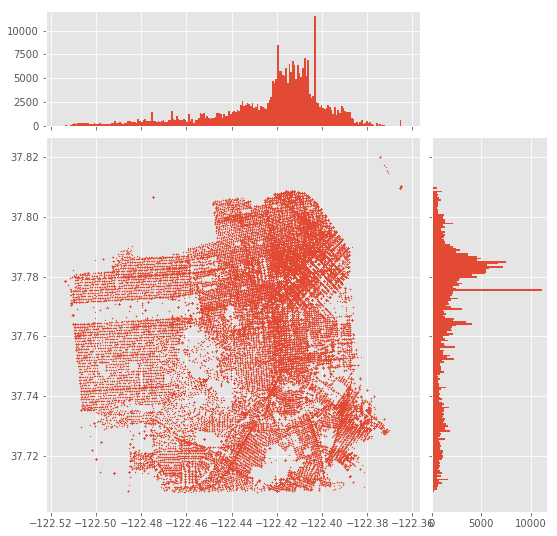

In [54]:
# Distribution of crimes over X/Y coordinates
# Remove 1-2 outliers with wrong X/Y
df = df[df['X'] < -121]

from matplotlib.ticker import NullFormatter
nullfmt = NullFormatter()         # no labels

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]

plt.figure(1, figsize=(8, 8))

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

# no labels
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)

# the scatter plot:
axScatter.scatter(df['X'], df['Y'], s=0.5)

bins=200
axHistx.hist(df['X'], bins=bins)
axHisty.hist(df['Y'], bins=bins, orientation='horizontal')

axHistx.set_xlim(axScatter.get_xlim())
axHisty.set_ylim(axScatter.get_ylim())
plt.show()

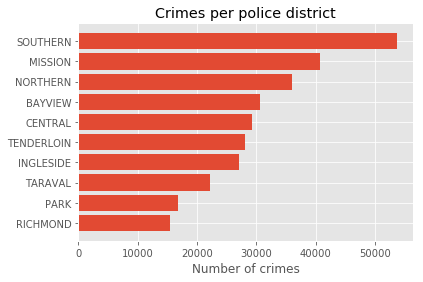

In [56]:
crime_per_dist = df.groupby('PdDistrict').size().reset_index().sort_values([0], ascending=False)
fig, ax = plt.subplots()
ax.barh(range(0, len(crime_per_dist['PdDistrict'])), crime_per_dist[0], align='center')
ax.set_yticks(range(0, len(crime_per_dist['PdDistrict'])))
ax.set_yticklabels(crime_per_dist['PdDistrict'])
ax.invert_yaxis() # this or ascending=True
ax.set_xlabel('Number of crimes')
plt.title('Number of crimes per police district')
plt.show()

## Crimes per category
Which category has most crimes? How are the crimes distributed over the categories?

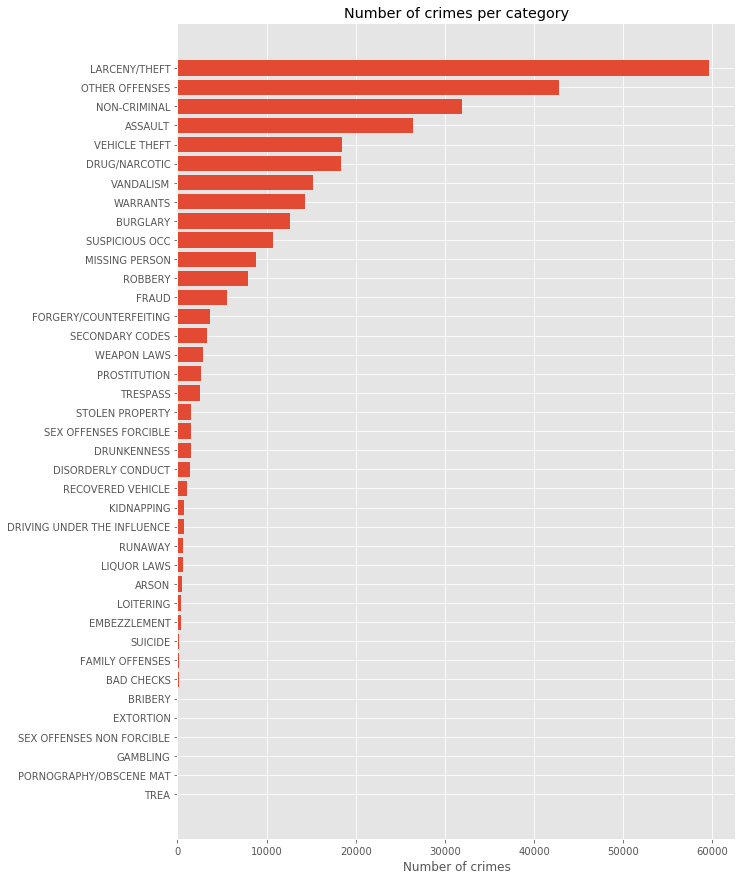

In [66]:
crime_per_cat = df.groupby('Category').size().reset_index().sort_values([0], ascending=False)
fig, ax = plt.subplots(figsize=(10, 15))
ax.barh(range(0, len(crime_per_cat['Category'])), crime_per_cat[0], align='center')
ax.set_yticks(range(0, len(crime_per_cat['Category'])))
ax.set_yticklabels(crime_per_cat['Category'])
ax.invert_yaxis() # this or ascending=True
ax.set_xlabel('Number of crimes')
plt.title('Number of crimes per category')
plt.show()

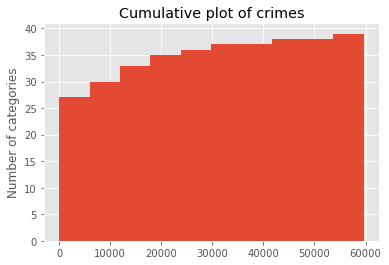

In [86]:
axes = crime_per_cat.hist(cumulative=True)
axes[0][0].set_ylabel('Number of categories')
plt.title('Cumulative plot of crimes')
plt.show()

## Analysing time information


first date: 2003-01-06 00:01:00
last date: 2015-05-13 23:53:00


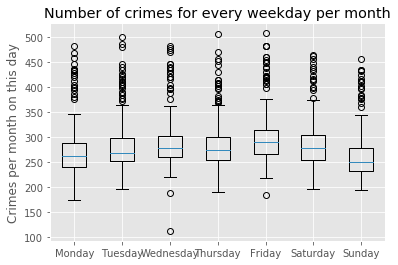

In [165]:
# Add time data
df['year'] = df['Dates'].apply(lambda x: x.year)
df['month'] = df['Dates'].apply(lambda x: x.month)
df['day'] = df['Dates'].apply(lambda x: x.day)
df['hour'] = df['Dates'].apply(lambda x: x.hour)
print('first date:', df['Dates'].min())
print('last date:', df['Dates'].max())

# Day of week for every week
# Dataset only goets till May 2015, so we discard data from 2015
crime_for_dayofweek = df[df['year'] < 2015].groupby(['DayOfWeek', 'year', 'month']).size().reset_index()
WEEKDAYS = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
data = []
for weekday in WEEKDAYS:
    data.append(crime_for_dayofweek[crime_for_dayofweek['DayOfWeek'] == weekday][0].values)
plt.boxplot(data, labels=WEEKDAYS)
plt.title('Number of crimes for every weekday per month')
plt.ylabel('Crimes per month on this day')
plt.show()

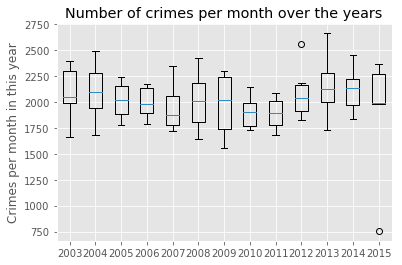

In [174]:
# Per year
crime_per_year = df.groupby(['year', 'month']).size().reset_index()
data = []
years = np.unique(crime_per_year['year'].values)
for year in years:
    data.append(crime_per_year[crime_per_year['year'] == year][0].values)
plt.boxplot(data, labels=years)
plt.title('Number of crimes per month over the years')
plt.ylabel('Crimes per month in this year')
plt.show()

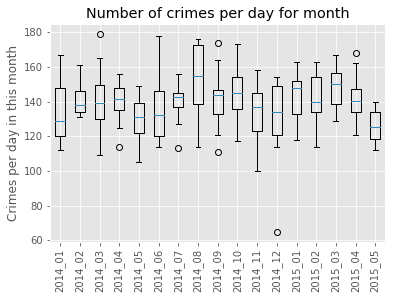

In [175]:
df['year_month'] = df['Dates'].apply(lambda x: str(x.year) + '_' + '{0:02d}'.format(x.month))
crime_per_month = df[df['year'] >= 2014].groupby(['year_month', 'day']).size().reset_index()
data = []
year_month = np.unique(crime_per_month['year_month'].values)
for ym in year_month:
    data.append(crime_per_month[crime_per_month['year_month'] == ym][0].values)
plt.boxplot(data, labels=year_month)
plt.title('Number of crimes per day for month')
plt.ylabel('Crimes per day in this month')
plt.xticks(rotation=90)
plt.show()

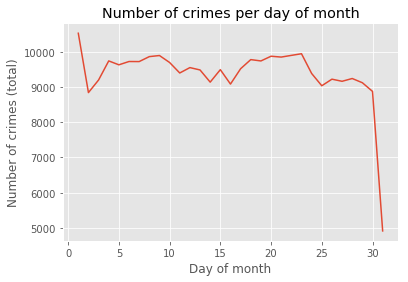

In [176]:
crime_per_day = df[df['year'] < 2015].groupby(['day']).size().reset_index()
plt.plot(crime_per_day['day'], crime_per_day[0])
plt.xlabel('Day of month')
plt.ylabel('Number of crimes (total)')
plt.title('Number of crimes per day of month')
plt.show()

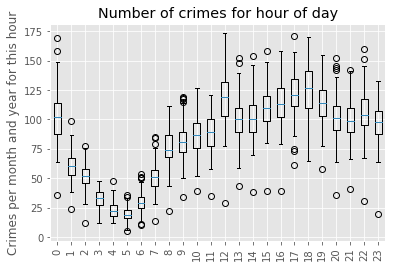

In [177]:
crime_per_hour = df.groupby(['hour', 'month', 'year']).size().reset_index()
data = []
hours = np.unique(crime_per_hour['hour'].values)
for hour in hours:
    data.append(crime_per_hour[crime_per_hour['hour'] == hour][0].values)
plt.boxplot(data, labels=hours)
plt.title('Number of crimes for hour of day')
plt.ylabel('Crimes per month and year for this hour')
plt.xticks(rotation=90)
plt.show()

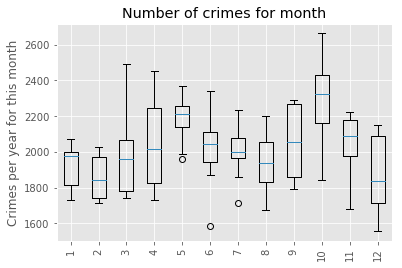

In [190]:
crime_per_month = df[df['year'] < 2015].groupby(['month', 'year']).size().reset_index()
data = []
months = np.unique(crime_per_month['month'].values)
for month in months:
    data.append(crime_per_month[crime_per_month['month'] == month][0].values)
plt.boxplot(data, labels=months)
plt.title('Number of crimes for month')
plt.ylabel('Crimes per year for this month')
plt.xticks(rotation=90)
plt.show()

## 	Intermediate result 

Important features seem to be: Location of the crime and time at which the crime occured.

In [ ]:
#df["IsInterection"] = df["Address"].apply(lambda x: 1 if "/" in x else 0)

